stap 0:

In [12]:
# De benodigde bibliotheken inladen
import pandas as pd                   # Deze drie heb je eigenlijk altijd wel nodig
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  # Hiermee maak je mooiere grafieken, zoals de heatmat en de pairplot
import statsmodels.api as sm           # Hierin zitten onder meer de QQ-plot en de Influence plot
import statsmodels.formula.api as smf  # Hiermee kun je het lineaire regressiemodel opstellen en schatten
import statsmodels.stats.api as sms    # Hierin zit de Breuch-Pagan toets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats                # De meeste toetsen zitten hierin

stap 1:

In [13]:
##dataset inladen
import pandas as pd
studenten=pd.read_csv('studenten.csv')
studenten

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
0,Accountancy,6.86,7,12,11,8.4,uitwonend,ja,samenwonend,vmbo,5,8,8,NaN
1,Finance & Control,8.70,9,20,11,21.6,thuiswonend,ja,samenwonend,vmbo,6,6,6,NaN
2,Accountancy,10.00,10,19,16,16.1,thuiswonend,ja,gescheiden,havo,8,6,5,A
3,Accountancy,7.88,8,13,9,15.0,thuiswonend,ja,samenwonend,vmbo,5,7,8,NaN
4,Accountancy,6.13,7,13,14,12.8,thuiswonend,nee,samenwonend,vmbo,7,6,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Accountancy,6.64,5,13,13,10.9,thuiswonend,ja,samenwonend,havo,5,7,6,A
313,Accountancy,8.51,8,16,8,13.1,thuiswonend,ja,samenwonend,havo,7,7,5,A
314,Finance & Control,5.73,5,12,12,12.7,thuiswonend,ja,samenwonend,vmbo,6,6,5,NaN
315,Accountancy,6.88,8,6,16,14.2,thuiswonend,ja,samenwonend,vmbo,7,5,6,NaN


stap 2:  
Verken de data een beetje. Dat kan met de heatmap en/of de pairplot. Er zijn nog veel meer manieren: boxplots (daarmee kun je makkelijk uitbijters detecteren) of wat niet al.  
Denk ook aan categorale variabelen: die kun je gebruiken om bijvoorbeeld losse boxplots te maken, of punten te kleuren in een scatterplot. Zorg er overigens wel voor dat je grafieken betekenisvolle titels en as-benamingen hebben (dat heb ik in dit sjabloon duidelijk niet gedaan).

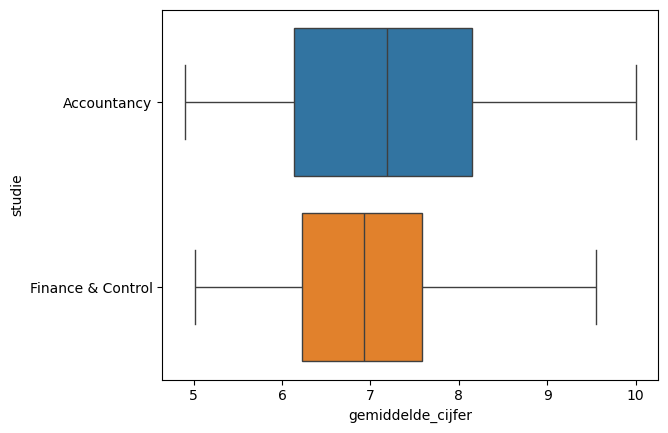

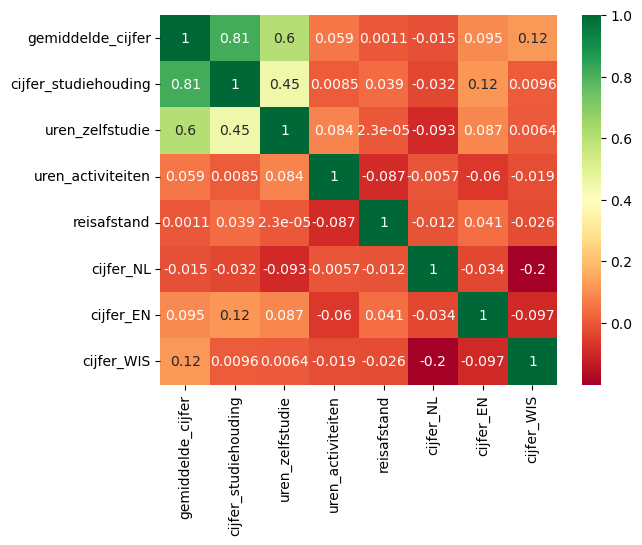

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Verkennen

# Boxplots om de verdeling van variabelen per categorie te bekijken
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['studie'], hue=studenten['studie'], orient="h")
plt.show()

# Heatmap om correlaties tussen numerieke variabelen te bekijken
numeric_cols = studenten.select_dtypes(include=['float64', 'int64']).columns
numeric_corr = studenten[numeric_cols].corr()
heat = sns.heatmap(numeric_corr, cmap="RdYlGn", annot=True)
plt.show()

# Pairplot om scatterplots van alle numerieke variabelen te bekijken, gegroepeerd per studie
pairs = sns.pairplot(studenten, hue='studie')
plt.show()


stap 3:  
Hierin pas je eventueel variabelen aan. Denk aan het maken van dummy variabelen, het vervangen of verwijderen van missings, labelen van uitbijters.

Maar ook het maken van nieuwe variabelen, zoals huur per vierkante meter o.i.d.

De regressie-schatting of de validatie-tests kunnen ook aanleiding zijn om (opnieuw) wat variabelen aan te maken of aan te passen

In [ ]:
# # Data Manipulatie

# # Zet een categorische variabele om naar dummy variabelen (bijvoorbeeld 'studie' naar dummy variabelen)
# # Hieronder wordt aangenomen dat 'studie' een categorische variabele is met twee categorieën: 'Accountancy' en 'Finance & Control'
# studenten = pd.get_dummies(studenten, columns=['studie'], drop_first=True)

# # Voorbeeld van het filteren van gegevens op basis van een voorwaarde (bijvoorbeeld gemiddeld cijfer hoger dan 7)
# studenten_gemiddeld_hoger_dan_7 = studenten[studenten['gemiddelde_cijfer'] > 7]

# # Voorbeeld van het vervangen van waarden in een kolom (bijvoorbeeld NaN vervangen door 0 in 'uren_zelfstudie')
# studenten['uren_zelfstudie'].fillna(0, inplace=True)

# # Voorbeeld van het maken van een nieuwe variabele op basis van bestaande variabelen (bijvoorbeeld de ratio van uren zelfstudie en activiteiten)
# studenten['zelfstudie_activiteiten_ratio'] = studenten['uren_zelfstudie'] / studenten['uren_activiteiten']

# # Als je niet tevreden bent met een kolom, kun je deze laten vallen
# studenten.drop(columns=['situatie_ouders'], inplace=True)

# # Je kunt ook gegevens op verschillende manieren filteren, manipuleren en transformeren, afhankelijk van je analysebehoeften.

# # Het is belangrijk om de impact van deze bewerkingen op je analyse te begrijpen en te overwegen.

stap 4:  
Hier ga je daadwerkelijk schatten.

Je kunt daarbij op basis van de correlaties beginnen met een klein model en dat steeds groter maken, zolang de Adjusted R2
blijft toenemen, of je begint met een vol model en haalt steeds variabelen weg totdat de Adjusted R2

gaat afnemen.

Bij de keuzes van de toe te voegen of te verwijderen variabelen maak je (ook) gebruik van de schattingsresultaten zelf (o.a. p
-waarden) en de toetsen op validatie van je model.

In [ ]:
# Schattingen doen

# Eerst stellen we een model op met Ordinary Least Squares (OLS)
model = smf.ols('gemiddelde_cijfer ~ cijfer_studiehouding + uren_zelfstudie + uren_activiteiten + reisafstand + C(woonsituatie) + C(eigen_studieruimte) + C(situatie_ouders) + cijfer_NL + cijfer_EN + cijfer_WIS', data=studenten)

# Daarna schatten we het model
regres = model.fit()

# Print de samenvatting van de regressieresultaten
print(regres.summary())

# Met 'regres' kunnen we verder analyses uitvoeren, zoals het interpreteren van de coëfficiënten en het maken van voorspellingen.

stap 5:  
Na elke schatting toets je of je model wel valide is:

    Zijn de residuen (bij benadering) normaal verdeeld: ^ε∼N

.
Hebben de residuen een gemiddelde van nul (centraliteit): E(^ε)=0
.
Hebben de residuen een variantie onafhankelijk van de y
-waarden (homoscedasticiteit): Var(^ε)=σ
.
Zijn de onafhankelijke variabelen niet te veel onderling gecorreleerd (multicolineariteit).

In [ ]:

# Q-Q plot
sm.qqplot(regres.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(regres.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))

# Test for central tendency
t_test = stats.ttest_1samp(regres.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plot
plt.scatter(regres.fittedvalues, regres.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plot
influence = regres.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan test
brpg = sms.het_breuschpagan(regres.resid, model.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check for multicollinearity
# Hier moet je zelf de matrix X vullen met alle numerieke variabelen die
# je hebt gebruikt als verklarende (exogene) variabelen. Als je categorale 
# variabelen hebt gebruikt moet je die zelf omzetten naar dummy-variabelen

X = studenten[['cijfer_studiehouding', 'uren_zelfstudie', 'uren_activiteiten', 'reisafstand', 'cijfer_NL', 'cijfer_EN', 'cijfer_WIS']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns): 
    print(col, ":", vif[i])